### The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

**1. Analysis that highlights your experimental hypothesis.**

**2. A rollout plan showing how you would implement and rollout the experiment**

**3. An evaluation plan showing what constitutes success in this experiment**

In [50]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from statsmodels.stats import weightstats as stests

In [51]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It looks like Survived and PassengerId has no missing value, where Age counts only 714 and there lots of missing values.

In [55]:
#lets see the missing Age values
titanic['Age'].isnull().sum()

177

In [95]:
tf=titanic[titanic['Age'].isna() ==  True]
tf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [112]:
tf[titanic['Sex']=='male'].count()


/Users/Top-Secret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


PassengerId    124
Survived       124
Pclass         124
Name           124
Sex            124
Age              0
SibSp          124
Parch          124
Ticket         124
Fare           124
Cabin           12
Embarked       124
dtype: int64

In [111]:
tf[titanic['Sex']=='female'].count()

/Users/Top-Secret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


PassengerId    53
Survived       53
Pclass         53
Name           53
Sex            53
Age             0
SibSp          53
Parch          53
Ticket         53
Fare           53
Cabin           7
Embarked       53
dtype: int64

higher number of male are missing their age than female.

In [113]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets see, if female passenger survived more than male passenger or not?

### Hypothesis:

**Null Hypothesis: H0** = Male survivor = female survivor

**Alternative Hypothesis: H1** = Female survivor > Male survivor



In [114]:
titan=titanic[['Sex', 'Survived', 'Age']]
titan.head()

,Sex,Survived,Age
0,male,0,22.0
1,female,1,38.0
2,female,1,26.0
3,female,1,35.0
4,male,0,35.0


In [115]:
titan.groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0.742038,27.915709
male,0.188908,30.726645


female survived more than male

In [116]:
titan.groupby(['Sex']).count()

,Survived,Age
Sex,,
female,314,261
male,577,453


in compare male passenger are more than female passenger, and female survivor are higher than male

In [117]:
titan[titan['Age'] > 30].groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0.805825,41.893204
male,0.202970,43.455446


there are higher number of male passenger who are missing their age, so couldn't which sex group has higher survivor who are older than 30.

In [118]:
titan[titan['Age'] > 30].groupby(['Sex']).count()

,Survived,Age
Sex,,
female,103,103
male,202,202


In [123]:
titan[titan['Age'] <=30].groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0.721519,18.803797
male,0.207171,20.482749


there are higher number of male passenger who are missing their age, so couldn't which sex group has higher survivor who are younger than 30.

In [120]:
titan[titan['Survived']==1].groupby(['Sex']).count()

,Survived,Age
Sex,,
female,233,197
male,109,93


233 female survived out of 314 and only 109 male survived out of 577.

In [124]:
titan[titan['Survived']==1].groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,1,28.847716
male,1,27.276022


In [125]:
titan[titan['Survived']==0].groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0,25.046875
male,0,31.618056


In [126]:
titan['Survived'].unique()

array([0, 1])

In [127]:
print('Survived count = ', len(titan[titan['Survived']==1]))
print('Passed count = ', len(titan[titan['Survived']==0]))
print('Survived  mean =', titan['Survived'].mean())


Survived count =  342
Passed count =  549
Survived  mean = 0.3838383838383838


In [131]:
tef=titan[titan['Survived']==1]
tef.head()

,Sex,Survived,Age
1,female,1,38.0
2,female,1,26.0
3,female,1,35.0
8,female,1,27.0
9,female,1,14.0


In [144]:
print('Survived female count = ', len(tef[titan['Sex']=='female']))
print('Survived male count = ', len(tef[titan['Sex']=='male']))
print(titan.groupby(['Sex']).mean())


Survived female count =  233
Survived male count =  109
        Survived        Age
Sex                        
female  0.742038  27.915709
male    0.188908  30.726645


/Users/Top-Secret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/Top-Secret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


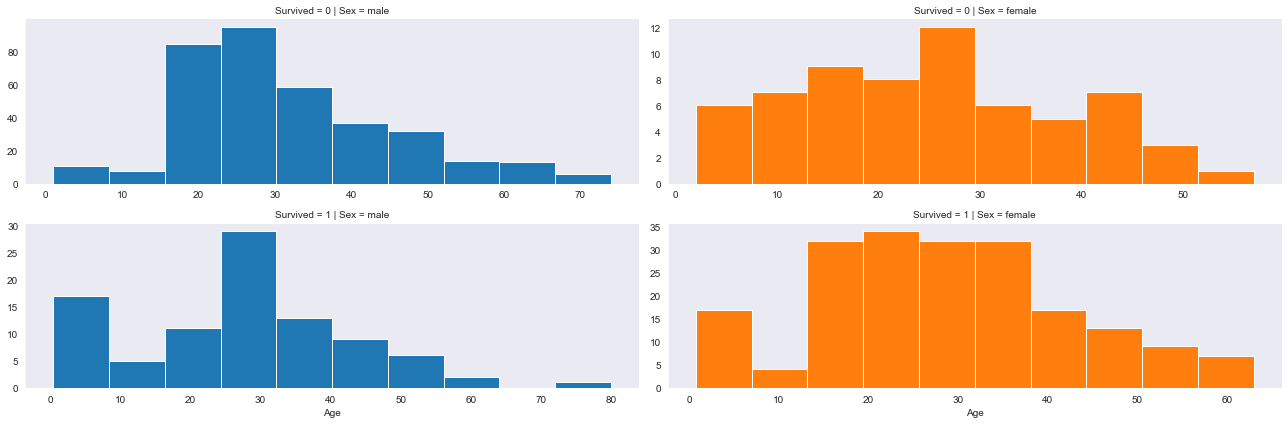

In [163]:
sns.set_style('dark')

g = sns.FacetGrid(titan,row='Survived',col='Sex', hue='Sex',aspect = 3,sharex=False, sharey=False, dropna=False)
g.map(plt.hist,'Age')
plt.show()

In [ ]:
stats.ttest_ind()